In [1]:
import os
import tensorflow as tf
import cv2
from tensorflow.keras.utils import to_categorical
import random
import numpy as np

In [2]:
category = os.listdir('dataset/train')
category

['pants', 'shirt', 'shorts', 't-shirt']

In [3]:
img = os.listdir('dataset/train/'+category[0])[0]
img

'01.jpg'

In [4]:
def preprocessing(dirpath, categories):
    array = []
    for cat in categories:
        path = os.path.join(dirpath, cat)
        label = categories.index(cat)  # Numeric label
        for img in os.listdir(path):
            img_path = os.path.join(path, img)
            imgarray = cv2.imread(img_path)/255.0
            imgarray = cv2.resize(imgarray, (224, 224))  # Ensure consistent size
            array.append([imgarray, label])
    random.shuffle(array)  # Shuffle before splitting
    features, labels = zip(*array)  # Separate features and labels
    return np.array(features), np.array(labels)


In [5]:
X_train, y_train = preprocessing('dataset/train', category)
X_test, y_test = preprocessing('dataset/test', category)


In [6]:
y_train = to_categorical(y_train, num_classes=len(category))
y_test = to_categorical(y_test, num_classes=len(category))


In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
datagen.fit(X_train)

In [8]:
len(X_train), len(X_test)

(160, 40)

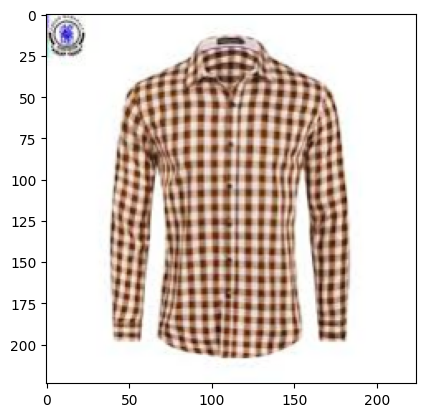

In [9]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0])

In [10]:
from tensorflow.keras import layers, models
from tensorflow.keras.applications import MobileNet
input_layer = layers.Input(shape=(224, 224, 3))

base_model = MobileNet(weights = 'imagenet', include_top = False, input_tensor = input_layer)

C:\Users\Asus\AppData\Local\Temp\ipykernel_13220\400360203.py:5: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNet(weights = 'imagenet', include_top = False, input_tensor = input_layer)


In [11]:
base_model.trainable = False


In [12]:
model = models.Sequential(
    [  
        base_model,
        layers.GlobalAveragePooling2D(),
        layers.Dense(1024, activation = 'relu'),
        layers.Dense(4, activation='softmax')
    ]
)
print(base_model.input)

[<KerasTensor shape=(None, 224, 224, 3), dtype=float32, sparse=False, name=keras_tensor>]


In [13]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [16]:
history = model.fit(
    datagen.flow(X_train, y_train, batch_size=32),
    epochs=10,
    verbose=1
)


f:\Cloth Similarity\cloth_env\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10


f:\Cloth Similarity\cloth_env\Lib\site-packages\keras\src\models\functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(None, 224, 224, 3))
  warnings.warn(msg)


5/5 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.3609 - loss: 2.0462  
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 914ms/step - accuracy: 0.7826 - loss: 0.5340
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 980ms/step - accuracy: 0.9371 - loss: 0.1799
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 895ms/step - accuracy: 0.9336 - loss: 0.2128
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 930ms/step - accuracy: 0.9619 - loss: 0.1151
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.9283 - loss: 0.1298
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.9773 - loss: 0.0713 
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 947ms/step - accuracy: 0.9902 - loss: 0.0344
Epoch 9/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 914ms/step - accuracy: 0.9949 - loss: 0.0269
Epoch 10/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 918ms/step - accuracy: 0.9795 - loss: 0.0727


In [18]:
model.evaluate(X_test, y_test)

f:\Cloth Similarity\cloth_env\Lib\site-packages\keras\src\models\functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(None, 224, 224, 3))
  warnings.warn(msg)


2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 220ms/step - accuracy: 0.9563 - loss: 0.0814


[0.09709447622299194, 0.949999988079071]

In [25]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenet_1.00_224 (Functional) │ (None, 7, 7, 1024)     │     3,228,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1024)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │     1,049,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │         4,100 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,803,918 (48.84 MB)

 Trainable params: 4,260,676 (16.25 MB)

 Non-trainable params: 21,888 (85.50 KB)

 Optimizer params: 8,521,354 (32.51 MB)

In [26]:
# Ensure the image preprocessing is correct
img = cv2.imread('dataset/train/pants/01.jpg') / 255.0
imgarray = cv2.resize(img, (224, 224))
imgarray = np.expand_dims(imgarray, axis=0)  # Add batch dimension
imgarray = tf.cast(imgarray, tf.float32)


In [27]:
feature_extractor = tf.keras.Model(inputs=base_model.input, outputs=base_model.output)

features = feature_extractor.predict(imgarray)

print(features.shape) 


f:\Cloth Similarity\cloth_env\Lib\site-packages\keras\src\models\functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(1, 224, 224, 3))
  warnings.warn(msg)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
(1, 7, 7, 1024)


In [28]:
features.flatten().shape

(50176,)

In [29]:
feature_extractor.save('feature_extractor.keras')

In [30]:
base_model.trainable = True

In [31]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [21]:
model.fit(
    datagen.flow(X_train, y_train, batch_size=32),
    epochs= 10,
    verbose = 1
)

f:\Cloth Similarity\cloth_env\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 20s 4s/step - accuracy: 0.7951 - loss: 0.7658
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 20s 4s/step - accuracy: 0.8925 - loss: 0.4080
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 18s 3s/step - accuracy: 0.9174 - loss: 0.3990
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 20s 4s/step - accuracy: 0.9949 - loss: 0.0186
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 20s 4s/step - accuracy: 0.9530 - loss: 0.2071
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 17s 3s/step - accuracy: 0.9741 - loss: 0.0538
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 18s 4s/step - accuracy: 0.9569 - loss: 0.1893
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 18s 4s/step - accuracy: 0.9512 - loss: 0.1161
Epoch 9/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 18s 3s/step - accuracy: 0.9923 - loss: 0.0228
Epoch 10/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 18s 4s/step - accuracy: 0.9860 - loss: 0.0824


In [22]:
model.evaluate(X_test, y_test)

f:\Cloth Similarity\cloth_env\Lib\site-packages\keras\src\models\functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(None, 224, 224, 3))
  warnings.warn(msg)


2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 262ms/step - accuracy: 0.8750 - loss: 0.2881


[0.2973913550376892, 0.875]

In [32]:
feature_extractor = tf.keras.Model(inputs=base_model.input, outputs=base_model.output)

In [33]:
features = feature_extractor.predict(imgarray)

print(features.shape) 

f:\Cloth Similarity\cloth_env\Lib\site-packages\keras\src\models\functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(1, 224, 224, 3))
  warnings.warn(msg)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 780ms/step
(1, 7, 7, 1024)


In [34]:
feature_extractor.save('feature_extractor.keras')